In [ ]:
import pandas as pd
import numpy as np
!pip install geopandas
!pip install pyproj
import geopandas as gpd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from google.colab import drive           
drive.mount('/content/drive')
%cd /content/drive/My Drive/Colab Notebooks/Final PRoject

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 13.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 16.4/16.4 MB 27.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.7/7.7 MB 42.6 MB/s eta 0:00:00
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Mounted at /content/drive
/content/drive/.shortcut-targets-by-id/1T98Lv-9QiRbA6FXEMM9Ee_7sJAAsnhPH/Colab Notebooks/Final PRoject


**In this notebook, we will apply clustering on Airbnb listings by 'name'. Also, process the Subway dataset and assign nearest subway station to each listing.**

In [ ]:
listings = pd.read_csv("listings.csv")
print (f" Listings dataset shape: {listings.shape}")
listings.head()

 Listings dataset shape: (42931, 18)


<ipython-input-2-0ac10a1ca92a>:1: DtypeWarning: Columns (17) have mixed types. Specify dtype option on import or set low_memory=False.
  listings = pd.read_csv("listings.csv")


,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN


## **Preprocessing Subway Data.**

In [ ]:
subway = pd.read_csv("Subway.csv")
print (f" Subway dataset shape: {subway.shape}")
subway.head()
#There are a total of 473 subway stations in NYC.

 Subway dataset shape: (473, 6)


,URL,OBJECTID,NAME,the_geom,LINE,NOTES
0,http://web.mta.info/nyct/service/,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
1,http://web.mta.info/nyct/service/,2,Canal St,POINT (-74.00019299927328 40.71880300107709),4-6-6 Express,"4 nights, 6-all times, 6 Express-weekdays AM s..."
2,http://web.mta.info/nyct/service/,3,50th St,POINT (-73.98384899986625 40.76172799961419),1-2,"1-all times, 2-nights"
3,http://web.mta.info/nyct/service/,4,Bergen St,POINT (-73.97499915116808 40.68086213682956),2-3-4,"4-nights, 3-all other times, 2-all times"
4,http://web.mta.info/nyct/service/,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568),3-4,"4-nights, 3-all other times"


In [ ]:
subway=subway[["OBJECTID", "NAME", "the_geom"]]
subway.head()

,OBJECTID,NAME,the_geom
0,1,Astor Pl,POINT (-73.99106999861966 40.73005400028978)
1,2,Canal St,POINT (-74.00019299927328 40.71880300107709)
2,3,50th St,POINT (-73.98384899986625 40.76172799961419)
3,4,Bergen St,POINT (-73.97499915116808 40.68086213682956)
4,5,Pennsylvania Ave,POINT (-73.89488591154061 40.66471445143568)


In [ ]:
subway['the_geom'] = subway['the_geom'].str.replace('POINT ', '')
subway['the_geom'] = subway['the_geom'].str.replace(r'[()]', '')
subway[['Longitude', 'Latitude']] = subway['the_geom'].str.split(' ', expand=True)
#Split'the_geom' to longitude and latitude separately.
subway.drop( "the_geom", inplace=True, axis=1)
subway.rename(columns={subway.columns[2]:"Subway_longitude", subway.columns[3]:"Subway_latitude"}, inplace=True)
subway["Subway_longitude"] = subway["Subway_longitude"].astype(float).round(5)
subway["Subway_latitude"] = subway["Subway_latitude"].astype(float).round(5)

<ipython-input-18-461505518ada>:2: FutureWarning: The default value of regex will change from True to False in a future version.
  subway['the_geom'] = subway['the_geom'].str.replace(r'[()]', '')


In [ ]:
subway.head()

,OBJECTID,NAME,Subway_longitude,Subway_latitude
0,1,Astor Pl,-73.99107,40.73005
1,2,Canal St,-74.00019,40.71880
2,3,50th St,-73.98385,40.76173
3,4,Bergen St,-73.97500,40.68086
4,5,Pennsylvania Ave,-73.89489,40.66471


In [ ]:
subway.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 473 entries, 0 to 472
Data columns (total 4 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   OBJECTID          473 non-null    int64  
 1   NAME              473 non-null    object 
 2   Subway_longitude  473 non-null    float64
 3   Subway_latitude   473 non-null    float64
dtypes: float64(2), int64(1), object(1)
memory usage: 14.9+ KB


## **Calculate distances between each subway station and each listing.**

In [ ]:
!pip install geopy
from geopy.distance import geodesic

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**Find the latitude and longitude of the nearest subway station. Run time 1.15 hour**

In [ ]:
def nearestStation(row):
  '''Returns the longitude and latitude of the nearest subway station.'''

  listingLocation = (row['latitude'], row['longitude'])
  stationLocations = list(zip(subway['Subway_latitude'], subway['Subway_longitude']))
  distances = [geodesic(listingLocation, station).meters for station in stationLocations]
  nearest_stationIndex = distances.index(min(distances))
  nearest_station = subway.iloc[nearest_stationIndex]
  return pd.Series([nearest_station['Subway_latitude'], nearest_station['Subway_longitude']])

#Apply the nearestStation function to each row in Listings.
#Two additional columns of longitude and latitude of nearest subway station.
listings[['NearestStationLatitude', 'NearestStationLongitude']] = listings.apply(nearestStation, axis=1)

In [ ]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,NearestStationLatitude,NearestStationLongitude
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN,40.75418,-73.98459
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN,40.68138,-73.95685
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN,40.80397,-73.96685
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN,40.76457,-73.98073
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN,40.66541,-73.99287


In [ ]:
listings.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,NearestStationLatitude,NearestStationLongitude
42926,839753193689829909,bright studio in Williamsburg,28057253,Jean,Brooklyn,Williamsburg,40.718976,-73.963985,Entire home/apt,76,7,0,NaN,NaN,1,8,0,NaN,40.71717,-73.95666
42927,839786573617495393,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Charlene,Manhattan,East Village,40.721703,-73.981473,Private room,32,30,0,NaN,NaN,5,79,0,NaN,40.71831,-73.98741
42928,839797749155954018,Fantastic 3BD apt in Brooklyn,26349246,Jose,Brooklyn,Bushwick,40.688700,-73.907650,Entire home/apt,127,3,0,NaN,NaN,8,356,0,NaN,40.68887,-73.90396
42929,839814083143454171,The Coziest Home,48533809,Remmy,Staten Island,Bull's Head,40.616911,-74.164652,Entire home/apt,280,1,0,NaN,NaN,1,87,0,NaN,40.61662,-74.03088
42930,839817199240589949,378-2L-Red,488616033,Mikey,Brooklyn,Williamsburg,40.713091,-73.957205,Private room,78,90,0,NaN,NaN,69,309,0,NaN,40.71717,-73.95666


**Calculate the distance (miles) between the listing and its nearest subway station.**

In [ ]:
def nearestDistance(row):
  '''Calculate the distance (miles) between the listings and its nearest subway station using geodesic distance.
  Using logitude and latitude of each point.'''

  propertyLocation = (row['latitude'], row['longitude'])
  stationLocation = (row['NearestStationLatitude'], row['NearestStationLongitude'])
  distance = geodesic(propertyLocation, stationLocation).miles
  return distance

#Apply the cnearestDistance function to each row in Listings.
listings['Distance'] = listings.apply(nearestDistance, axis=1)

In [ ]:
listings.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,NearestStationLatitude,NearestStationLongitude,Distance
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,...,49,2022-06-21,0.30,3,314,1,NaN,40.75418,-73.98459,0.067703
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,...,50,2019-12-02,0.30,2,365,0,NaN,40.68138,-73.95685,0.288617
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,...,118,2017-07-21,0.72,1,0,0,NaN,40.80397,-73.96685,0.036540
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,...,575,2023-02-19,3.41,1,106,52,NaN,40.76457,-73.98073,0.128014
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,...,3,2022-08-10,0.03,1,181,1,NaN,40.66541,-73.99287,0.209688


In [ ]:
listings.tail()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,NearestStationLatitude,NearestStationLongitude,Distance
42926,839753193689829909,bright studio in Williamsburg,28057253,Jean,Brooklyn,Williamsburg,40.718976,-73.963985,Entire home/apt,76,...,0,NaN,NaN,1,8,0,NaN,40.71717,-73.95666,0.404256
42927,839786573617495393,Room in the heart of LES with Gym& Rooftop BBQ,247439246,Charlene,Manhattan,East Village,40.721703,-73.981473,Private room,32,...,0,NaN,NaN,5,79,0,NaN,40.71831,-73.98741,0.389858
42928,839797749155954018,Fantastic 3BD apt in Brooklyn,26349246,Jose,Brooklyn,Bushwick,40.688700,-73.907650,Entire home/apt,127,...,0,NaN,NaN,8,356,0,NaN,40.68887,-73.90396,0.194169
42929,839814083143454171,The Coziest Home,48533809,Remmy,Staten Island,Bull's Head,40.616911,-74.164652,Entire home/apt,280,...,0,NaN,NaN,1,87,0,NaN,40.61662,-74.03088,7.033863
42930,839817199240589949,378-2L-Red,488616033,Mikey,Brooklyn,Williamsburg,40.713091,-73.957205,Private room,78,...,0,NaN,NaN,69,309,0,NaN,40.71717,-73.95666,0.282937


**Now we got the location and distance between each listings and its nearest subway station.**

## **Clustering Listings 'name'**

In [ ]:
from sklearn.feature_extraction.text import  TfidfVectorizer
from sklearn.cluster import KMeans
import re
#Import modules for text feature extraction and KMeans clustering.

import nltk
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
#Import module for text processing and stemming.

In [ ]:
description = listings[["id","name"]]
description.head()

,id,name
0,2595,Skylit Midtown Castle
1,5121,BlissArtsSpace!
2,5203,Cozy Clean Guest Room - Family Apt
3,5178,Large Furnished Room Near B'way
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden"


In [ ]:
description.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42931 entries, 0 to 42930
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   id      42931 non-null  int64 
 1   name    42919 non-null  object
dtypes: int64(1), object(1)
memory usage: 670.9+ KB


In [ ]:
def stem(text):
  '''Takes input text and stem it to simple version of each word.
  Ex: 'running' --> 'run' '''
  ps = PorterStemmer()
  y = []
  if isinstance(text, str):  # Check if text is a non-null string
      for i in text.split():
          y.append(ps.stem(i))
  return " ".join(y)

In [ ]:
description["name"] = description["name"].apply(stem)
#Apply def stem to each "name" instance in Listings dataset.

<ipython-input-34-b0bc421f0204>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  description["name"] = description["name"].apply(stem)


## **Processing stop words.**

In [ ]:
def customTokenizer(text):
  '''Returns word tokens from input text. Filter out tokens that represent numeric values and numbers followed by a single quote '101cozy'.'''
  tokens = re.findall(r'\b(?![0-9]+\b\')\w+\b', text)
  return tokens

vectorizer = TfidfVectorizer(stop_words='english', tokenizer=customTokenizer)
#Create and instance TF-IDF vectorizer with the English stop words removed.
features = vectorizer.fit_transform(description["name"].fillna(""))
#Perform TF-IDF on the text data in 'name' attribute, exclude stop words.

/usr/local/lib/python3.10/dist-packages/sklearn/feature_extraction/text.py:528: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [ ]:
featureNames = vectorizer.get_feature_names_out()
#Get a list of feature names corresponding to the columns in the TF-IDF matrix.
featuresData = pd.DataFrame(features.toarray(), columns=featureNames)
#Convert to pandas dataframe. Row: listing 'name. Column: featureNames words/tokens.
featureColumns = featuresData.columns.to_list()
#Extract a list of featureNames words/tokens. 
print(featureColumns)

['0', '000', '000sq', '01', '02', '03', '045', '06', '07', '09', '1', '10', '100', '1000', '1000ft²', '1000sf', '1000sq', '1000sqf', '1000sqft', '10017', '10030', '10032', '1008', '1009', '100ft', '100mbp', '101', '101cozi', '102', '10223', '10226', '10243', '10250', '10253', '10254', '10263', '10264', '10273', '10292', '10298', '10299', '102nd', '103', '10303', '10304', '10305', '10307', '10313', '10315', '10323', '10327', '10328', '10334', '10335', '10344', '10345', '10349', '10351', '10352', '10354', '1036', '10360', '10364', '10365', '10366', '10367', '10368', '10374', '103rd', '104', '1040', '1042', '10490', '10491', '105', '105th', '106', '107', '107th', '108', '1089', '109', '1090', '1091', '10jfk', '10m', '10mi', '10mil', '10min', '10min2jfk', '10mins', '10minstojfk', '10mintonyc', '10minut', '10mln', '10th', '10交通便利', '10畳', '11', '110', '1100', '11000', '1100sf', '1103', '1108', '110st', '111', '11210', '11228', '11231', '113', '11416', '11417', '11418', '11419', '11431', '11

In [ ]:
removingPattern = ['0', '000', '000sq', '01', '02', '03', '045', '06', '07', '09', '1', '10', '100', '1000', '1000ft²', '1000sf', '1000sq', '1000sqf', '1000sqft', '10017', '10030', '10032', '1008', '1009', '100ft', '100mbp', '101', '101cozi', '102', '10223', '10226', '10243', '10250', '10253', '10254', '10263', '10264', '10273', '10292', '10298', '10299', '102nd', '103', '10303', '10304', '10305', '10307', '10313', '10315', '10323', '10327', '10328', '10334', '10335', '10344', '10345', '10349', '10351', '10352', '10354', '1036', '10360', '10364', '10365', '10366', '10367', '10368', '10374', '103rd', '104', '1040', '1042', '10490', '10491', '105', '105th', '106', '107', '107th', '108', '1089', '109', '1090', '1091', '10jfk', '10m', '10mi', '10mil', '10min', '10min2jfk', '10mins', '10minstojfk', '10mintonyc', '10minut', '10mln', '10th', '10交通便利', '10畳', '11', '110', '1100', '11000', '1100sf', '1103', '1108', '110st', '111', '11210', '11228', '11231', '113', '11416', '11417', '11418', '11419', '11431', '11432', '11433', '11434', '11435', '11436', '115', '1150', '11588', '116', '116th', '117', '117th', '118', '118th', '119', '11ft', '11min', '11th', '12', '1200', '1200q', '1200sf', '1200sqft', '1228', '1239', '124', '1241', '125', '1250', '1250sq', '125th', '126', '1266', '127', '1270', '1271', '1274', '128', '1288', '129', '129th', '12a', '12b', '12ft', '12min', '12th', '12x12', '12x14', '13', '130', '1300', '1308', '1309', '131', '1311', '132', '1326', '1339', '134', '135', '1350', '1352', '135st', '136', '1367', '137', '138', '1382', '1387', '1388', '1389', '139', '13min', '14', '1400', '1408', '141', '1411', '141st', '141th', '142', '1425', '143', '1435', '144', '1440sqft', '145', '1450', '145st', '145th', '146', '1469', '147', '148', '149', '149bk', '14ft', '14th', '15', '150', '1500', '1500sf', '1500sq', '1500sqft', '151', '153', '1530', '154', '155', '1550', '156', '1563', '1567', '157', '1571', '1572', '1573', '158', '1580', '159', '1597', '15ft', '15m', '15min', '15minjfk', '15mins', '15minut', '15mn', '15th', '15to', '16', '160', '1600ft', '1600sf', '1600sq', '1609', '160th', '161', '162', '1626', '163', '1630', '164', '165', '1653', '166', '1661sft', '167', '167th', '168', '1681', '1682', '168st', '169', '16th', '17', '170', '1700', '1700sf', '1700sqf', '171', '1718', '17181love', '17182homelov', '17183love', '17188', '172', '173', '174', '175', '176', '1760', '177', '177st', '179', '17min', '17th', '18', '180', '1800', '1800ft²', '1800sq', '1800sqft', '181', '181st', '182', '183', '1830', '184', '185', '186', '1860', '1861', '1865', '187', '1870', '1875', '1879', '188', '1880', '189', '1890', '1892', '1899', '18jan', '18min', '18th', '18x19', '19', '190', '1900', '1900sq', '1902', '191', '1910', '1913', '1920', '1925', '1928', '19293314875', '193', '194', '1940', '195', '195m²', '196', '1960', '197', '198', '1984', '199', '1990larg', '1991', '19min', '19th', '1a', '1b', '1b1b', '1ba', '1bath', '1bd', '1bda', '1bdapt', '1bdr', '1bdrapart', '1bdrm', '1bdroom', '1bed', '1bedapt', '1bedroom', '1block', '1br', '1br3guest', '1brd', '1brin', '1brm', '1bth', '1c', '1cama', '1canarsie', '1cozi', '1d', '1doubl', '1double', '1e', '1entir', '1fl', '1g', '1huge', '1k', '1l', '1master', '1min', '1mintrain', '1night', '1pvt', '1r', '1rm', '1room', '1sofa', '1sofab', '1st', '1stop', '1twin', '1w', '1walk2', '2', '20', '200', '2000', '2000sf', '2000sq', '2000sqft', '2000呎', '200mb', '200sf', '201', '2010', '2014', '2015', '2017', '2018', '2018seren', '2019', '201brand', '202', '2020', '2021', '2022', '2023', '202room', '203', '204', '2040', '205', '206', '207', '208', '209', '20ft', '20m', '20min', '20minsjfk', '20minsjfkb', '20minsjfkc', '20mintomanhattan', '20minut', '20mn', '20th', '21', '210', '2100ft', '211', '212', '213', '214', '215', '215m', '216', '217', '218', '2180', '219', '21min', '21st', '22', '220', '2200', '2201', '2202', '2203', '221', '222', '2222', '224', '225', '2254', '226', '227', '228', '229', '22min', '23', '230', '2300sqft', '230th', '231', '232', '233', '233rd', '234', '2345', '235', '236', '237', '238', '239', '23b', '23rd', '24', '240', '2400', '240nest', '241', '242', '243', '244', '245', '2450', '246', '247', '248', '249', '24dec', '24h', '24hr', '24th', '24x7', '25', '250', '2500', '2500sq', '2500sqft', '251', '252', '253', '255', '256', '257', '258', '259', '25daysmin', '25m', '25min', '25th', '26', '260', '2600', '261', '262', '263', '264', '265', '266', '267', '268', '269', '26th', '27', '270', '2700', '271', '273', '274', '2750', '276', '277', '278', '279', '27a', '27b', '27c', '27d', '27e', '27f', '27g', '27h', '27th', '28', '280', '281', '282', '283', '285', '286', '287', '288', '289', '28a', '28b', '28c', '28d', '28e', '28f', '28g', '28h', '28th', '29', '290', '291', '292', '294', '295', '296', '297', '299', '29a', '29b', '29c', '29d', '29e', '29f', '29g', '29h', '2a', '2av', '2avenuegreat', '2b', '2b1b', '2b2b', '2ba', '2bath', '2bathroom', '2baths', '2bathsuit', '2bd', '2bdapt', '2bdm', '2bdr', '2bdrm', '2bdrmpresidenti', '2bdrms', '2bdroom', '2bed', '2bedrm', '2bedroom', '2bedrooms', '2beds', '2beds1bathroom', '2beds2bath', '2bl', '2block', '2bnb', '2br', '2br1b', '2br1ba', '2br2ba', '2brd', '2brduplex', '2brm', '2brs', '2brw', '2bth', '2bths', '2c', '2d', '2decks', '2doubl', '2e', '2f', '2fam', '2fb', '2fcomfi', '2fe', '2fl', '2full', '2h', '2k', '2l', '2lirr', '2min', '2minut', '2months', '2mwalk', '2n', '2nd', '2ndfl', '2oth', '2peo', '2peopl', '2ppl', '2privat', '2qn', '2queens', '2r', '2r1', '2r2', '2r3', '2rooms', '2single', '2st', '2stop', '2stori', '2story4bedroom', '2sub', '2th', '2train', '2unit', '2w', '2x', '2房1卫', '2部屋でのシェア', '3', '30', '300', '3000', '300ft', '300mb', '300sqft', '301', '302', '303', '304', '305', '306', '307', '309', '30day', '30lga', '30min', '30min2timessqr', '30mins', '30mn', '30mnt', '30th', '30美元一天', '31', '311', '312', '313', '314', '315', '316', '317', '319', '31c', '31privat', '32', '320', '321', '322', '323', '324', '325', '327', '328', '329', '32b', '32nd', '33', '330', '3300', '3301', '3302', '3303', '331', '332', '333', '3333', '3333broadway近哥大电梯公寓大楼', '334', '335', '336', '337', '338', '339', '33c', '34', '340', '3400', '341', '342', '343', '344', '345', '346', '347', '348', '349', '34th', '35', '350', '3500', '351', '352', '353', '354', '355', '356', '357', '358', '359', '35min', '35th', '36', '360', '361', '362', '363', '364', '366', '367', '369', '36th', '37', '370', '371', '373', '374', '375', '376', '377', '378', '379', '37th', '38', '380', '3801', '381', '382', '383', '384', '385', '386', '387', '388', '38min', '38th', '39', '3900', '392', '394', '397', '398', '399', '39th', '3a', '3b', '3ba', '3bath', '3bd', '3bdapt', '3bdr', '3bdrm', '3bdroom', '3bds', '3bed', '3bed2bath', '3bedrm', '3bedroom', '3beds', '3block', '3br', '3br1', '3br1ba', '3br2ba', '3br6guest', '3brm', '3brs', '3c', '3d', '3doubl', '3e', '3f', '3fl', '3flrs', '3hugeroom', '3k', '3l', '3m', '3mil', '3mile', '3min', '3month', '3pm', '3pp', '3ppl', '3privat', '3r', '3rd', '3rdfl', '3th', '3w', '3window', '3x', '4', '40', '400', '4000', '400mbpswifi', '400sqft', '401', '402', '403', '404', '405', '406', '407', '408', '409', '40min', '40st', '40th', '41', '410', '411', '412', '413', '414', '415', '416', '417', '418', '419', '41st', '42', '420', '4200', '420deli', '420spa', '420vib', '421', '422', '423', '424', '425', '426', '427', '428', '42nd', '42st', '43', '430', '431', '432', '433', '434', '435', '436', '437', '438', '439', '43d', '43st', '44', '440', '4401', '4402', '4403', '441', '442', '443', '444', '445', '446', '447', '448', '449', '44th', '45', '450', '4500', '450sf', '452', '453', '454', '4540', '455', '456', '458', '45th', '46', '460', '461', '462', '463', '465', '466', '467', '468', '46st', '46th', '47', '470', '4700', '471', '472', '473', '475', '476', '477', '478', '479', '48', '480', '481', '482', '483', '485', '486', '48th', '49', '490', '4900', '491', '4_3', '4a', '4avail', '4b', '4ba', '4bath', '4bd', '4bdr', '4bdr_heart', '4bdrm', '4bds', '4bed', '4bedrm', '4bedroom', '4beds', '4br', '4br1', '4br1ba', '4br2ba', '4br3ba', '4c', '4d', '4f', '4fl', '4h', '4j', '4k', '4ktv', '4l', '4m', '4min', '4mins', '4ppl', '4privat', '4r', '4th', '4unit', '4x', '5', '50', '500', '500mbp', '500sf', '500sft', '500sqft', '501', '5019', '502', '503', '504', '507', '50s', '50th', '50to', '51', '512', '513', '515', '517', '518', '519', '51e', '51st', '52', '520', '521', '522', '525', '526', '528', '529', '52nd', '52st', '53', '536', '53e', '53rd', '54', '541', '542', '549', '55', '550', '552', '55th', '56', '56th', '57', '573', '5750', '576', '57st', '57th', '585', '58th', '59', '590', '594', '595', '597', '599', '59th', '5a', '5b', '5ba', '5bath', '5bd', '5bdr', '5bed', '5bedrm', '5beds', '5bh', '5br', '5bth', '5c', '5d', '5e', '5f', '5fl', '5guest', '5k', '5l', '5lin', '5line', '5m', '5mi', '5mile', '5min', '5mins', '5minut', '5mto', '5n', '5ppl', '5r', '5star', '5subway', '5th', '5thave', '5分钟到西59', '5분', '6', '60', '600', '600ft²', '600sq', '601', '602', '60350', '606', '607', '61', '6101', '6103', '6104', '6105', '6106', '6107', '6108', '6109', '6110', '6110d', '6114', '6115', '6116', '6117', '6118', '6119', '6122', '6123', '6124', '6125', '6126', '6127', '6128', '613', '6130', '6131', '6132', '6133', '6134', '6135', '6138', '6139', '6140', '6142', '6143', '6144', '6145', '6146', '6147', '6148', '6149', '615', '6150', '6151', '6152', '6153', '6154', '6155', '6156', '6157', '6157d', '6158', '6159', '6160', '6161', '6162', '6163', '6164', '6165', '6166', '6167', '6168', '6169', '6169d', '6170', '6171', '6172', '619', '61f1', '61f2', '61f3', '61f4', '61st', '62', '623', '626', '628', '62f', '62nd', '63', '630', '63f1', '63f2', '63f3', '63f4', '63rd', '64', '640', '64th', '650', '6500', '651', '65st', '65th', '66', '66th', '66地铁站', '675sg', '676', '67th', '68', '688', '69', '690', '691', '692', '69th', '6a', '6b', '6bath', '6bd', '6bed', '6bedrm', '6br', '6d', '6fl', '6ft', '6m', '6mi', '6min', '6mins', '6minutefrom', '6month', '6ppl', '6th', '6train', '6x', '7', '70', '700', '700sf', '700sqft', '701', '703', '704', '706', '707', '708', '70s', '71', '710', '712', '713', '714', '715', '717', '719', '71st', '72', '721', '722', '723', '724', '727', '728', '72nd', '73', '733', '734', '737', '74', '741', '744', '749', '74st', '74th', '75', '750', '750sq', '754', '755', '757', '758', '75th', '76', '761', '763', '765', '77', '770', '772', '775', '77f', '78', '783', '784', '785', '787', '79', '791', '792', '797', '79th', '7bd', '7beds', '7efmr', '7line', '7m', '7min', '7mins', '7mn', '7th', '7thave', '7train', '8', '80', '800', '8000sqft', '800m', '800sqft', '806', '809', '81', '811', '813', '815', '816', '818', '819', '8194', '82', '820', '823', '826', '829', '83', '83rd', '83st', '84', '840', '84st', '84th', '85', '850', '857', '86', '862', '8670', '86st', '86th', '87', '8703', '8783', '88', '8827', '888', '89', '891', '8a', '8ave', '8b', '8br', '8c', '8min', '8mins', '8ppl', '8th', '9', '90', '900', '900ft', '900ft²', '900sf', '900sft', '909', '90m2', '90st', '91', '910', '92', '92nd', '93', '933', '94', '94th', '95', '950', '9500', '950sf', '957', '958', '95th', '96', '96st', '97', '971', '97th', '98', '980', '99', '99m', '9bed', '9ft', '9min', '9th', '_', 'a1', 'aa', 'aaa', 'abbot', 'abc', 'abcd', 'abcd1', 'abcd23','k10mins', 'jfk30min', 'jfk5milga15min', 'jfk5min', 'jfk5minentireapt', 'jfk7', 'jfk7lga15min', 'jfk9m', 'jfkairport', 'jfk机场', 'jfk白石镇温馨小屋', 'jg', 'jh', 'jiggi', 'n', 'n2', 'n210', 'n3', 'n4', 'n406', 'n441', 'n478', 'n5', 'n6', 'n677', 'n770', 'n775', 'n779', 'n8', 'n832', 'n833', 'niceroomniceneighborhoodclosemaimonideshospitanyuh', 'no11', 'no14', 'no15', 'no16', 'no17', 'no18', 'no1r', 'no2', 'no3', 'no4', 'noa', 'nyc法拉盛中心新装修房wifi', 'nye', 'nyer', 'nyloc', 'nyma', 'nyorker', 'nyp', 'nyti', 'nytim', 'nyu', 'nyミッドタウン高級コンドのリビングルームに宿泊', 'o','park独立卧室出租', 'skyview天景高级私人公寓', 'sl', 'st_2室1厅_', 'studio舒适洁净的保证', 'town法拉盛奢华洁净整齐房间', 'trains近地铁单房', 'zona', 'zone', 'zoo', 'zzz', '²', '½', 'à', 'á', 'áine', 'área', 'único', 'über', 'übercharm', 'ʖ', 'α', 'β', 'βx', 'балконом', 'в', 'комната', 'манхеттене', 'марта', 'октября', 'отличном', 'раёне', 'русский', 'с', 'светлая', 'сдаётся', 'февраля', 'בבית', 'בקראון', 'ברוקלין', 'הייטס', 'חדרים', 'להשכרה', 'עברית', 'עד', 'פרטי', 'ウィリアムズバーグから３駅', 'キッチン付き', 'ニューヨークの中心', 'ブルックリンの大人気エリア', 'マンハッタンまで１５分', 'ミッドタウンウエストサイド', '一房一厅', '一房一厅超大公寓', '东村文艺风主卧', '两个大房间一间小房间', '两个窗doubl', '两张双人床房间two', '中央公园旁的现代公寓', '中文', '中等大小的厨房', '中英文', '中英文服务', '为了自由', '乾淨舒適2間臥房', '了解www', '了解更多旅游', '交通便利的', '位于曼哈顿纽约上城', '佳源家庭旅馆', '來最火的中國城', '停车容易', '停车方便', '像纽约有个温馨的家', '全新', '全新漂亮的公寓', '出门就是地铁站', '功能齐全', '单房干净舒适', '和缘国旅', '和缘特色浪漫房', '和缘阳光民宿', '哥伦比亚大学附近公寓内客厅一间', '商务最佳', '在你白天任意旅遊後', '大双人床房间', '大客厅', '大屋女單', '大陽台', '奢华大套房', '女單可停車', '安静整洁', '安静空间quiet', '完全個室', '家庭式單間雙人床k', '家庭式旅馆獨立衛生間套房k', '家庭式民宿雙人房k', '宽敞明亮', '専用バストイレ', '小黑的家', '布鲁克林区', '带按摩浴缸和淋浴的独立卫生间', '干净', '彡', '應有盡有', '摩登新装修半地下小套房', '旅客之家', '旅途中的家', '日本語もok', '日本語対応可能', '明亮', '曼哈顿', '曼哈顿上西区林肯中心附近优质公寓短租', '曼哈顿奢侈公寓次卧manhattan', '曼哈顿林肯中心一室一厅', '月', '有家客居', '有家客居75', '望江新居', '林肯中心', '森林小丘别墅', '欢迎中国朋友', '欢迎中国游客短租', '正面能量', '每一间价格都不一样', '民宿信息www', '民宿套房', '法拉盛', '法拉盛中心privat', '法拉盛中心單人房间', '法拉盛中心房', '法拉盛中心独立房间', '法拉盛中心私人房間獨立衛浴', '法拉盛唯美独立房间', '法拉盛步行到地铁', '法拉盛步行到地铁站', '法拉盛步行地铁', '法拉盛步行地铁站', '法拉盛清靜小築', '法拉盛温馨亲子房', '法拉盛皇后大学温馨房间', '法拉盛社区达人欢迎你', '法拉盛美丽豪华大套房', '法拉盛高档', '法拉聖', '浪漫情怀整套三房一厅2卫', '浪漫民宿', '浪漫风格整套房2房一厅2卫', '浴室共用', '温馨room2', '温馨大套房', '温馨如家', '温馨方便cozi', '温馨舒适', '温馨舒适整套房4房2卫一厅', '火车站和市中心客房', '独立出入basement套房出租', '独立卫生间', '独立房间', '独立洗手间', '独立洗手间privatebathroom', '独立洗手间和马桶', '獨立出入', '环境优美', '环境非常干净', '環境優美整潔新淨', '環境安靜', '皇后区', '皇后區的快活雅房', '綺麗で静かで快適', '纽约之家', '纽约单一家庭住宅', '纽约市曼哈顿中城east', '纽约干净大房近地铁站', '纽约法拉盛幸运旅程', '纽约长岛市最新豪华网红楼王jackson', '舒适3人间', '舒适独立房间法拉盛步行地铁站', '舒适阳光房', '若感兴趣联系我', '華埠', '西藏民居', '谢谢', '豪华双人间', '豪华独立3人间', '豪华独立大房间', '豪華舒適套房', '走路3分鐘到地鐵站', '近lga', '近七号地铁站', '阳光之家', '阳光民宿', '阳光温馨单房', '限女生', '駅から徒歩3分', '駅から徒歩４分', '高级住宅区', '고급', '교통', '깨끗한', '뉴욕을', '도어맨', '센트럴파크에서', '수', '스튜디오', '신축', '아스토리아', '아파트', '안전하고', '웨스트빌리지에', '위치한', '일상의', '있는', '즐길', '침실', '편리', '평화로운']
#Add the removing patterns.

In [ ]:
print("Patterns to remove:", removingPattern)
print("Column names in featuresData:", featuresData.columns)

Patterns to remove: ['0', '000', '000sq', '01', '02', '03', '045', '06', '07', '09', '1', '10', '100', '1000', '1000ft²', '1000sf', '1000sq', '1000sqf', '1000sqft', '10017', '10030', '10032', '1008', '1009', '100ft', '100mbp', '101', '101cozi', '102', '10223', '10226', '10243', '10250', '10253', '10254', '10263', '10264', '10273', '10292', '10298', '10299', '102nd', '103', '10303', '10304', '10305', '10307', '10313', '10315', '10323', '10327', '10328', '10334', '10335', '10344', '10345', '10349', '10351', '10352', '10354', '1036', '10360', '10364', '10365', '10366', '10367', '10368', '10374', '103rd', '104', '1040', '1042', '10490', '10491', '105', '105th', '106', '107', '107th', '108', '1089', '109', '1090', '1091', '10jfk', '10m', '10mi', '10mil', '10min', '10min2jfk', '10mins', '10minstojfk', '10mintonyc', '10minut', '10mln', '10th', '10交通便利', '10畳', '11', '110', '1100', '11000', '1100sf', '1103', '1108', '110st', '111', '11210', '11228', '11231', '113', '11416', '11417', '11418', '

In [ ]:
def customTokenizer(text):
  '''Returns word tokens from input text. Filter out tokens that represent numeric values and numbers followed by a single quote '101cozy'.'''
  tokens = re.findall(r'\b(?![0-9]+\b\')\w+\b', text)
  return tokens

vectorizer = TfidfVectorizer(stop_words='english', tokenizer=customTokenizer)
#Create and instance TF-IDF vectorizer with the English stop words removed.
features = vectorizer.fit_transform(description["name"].fillna(""))
#Perform TF-IDF on the text data in 'name' attribute, exclude stop words.

featureNames = vectorizer.get_feature_names_out()
#Get a list of feature names corresponding to the columns in the TF-IDF matrix.
featuresData = pd.DataFrame(features.toarray(), columns=featureNames)
#Convert to pandas dataframe. Row: listing 'name. Column: featureNames words/tokens.
featureColumns = featuresData.columns.to_list()
#Extract a list of featureNames words/tokens. 
print(featureColumns)

#Iterate over the columns to remove stop words.
for stopWord in featureColumns:
    if stopWord in featuresData.columns:
        featuresData.drop(stopWord, axis=1, inplace=True)
    else:
        print(f"Stop Word '{stopWord}' not found. Skipping...")

**Run time 30 mins.**

In [ ]:
#Iterate over the columns to remove stop words.
for stopWord in removingPattern:
    if stopWord in featuresData.columns:
        featuresData.drop(stopWord, axis=1, inplace=True)
    else:
        print(f"Stop Word '{stopWord}' not found. Skipping...")

Stop Word 'k10mins' not found. Skipping...


In [ ]:
featuresData.head()

,abducens,abnb,abod,abode,abov,absolut,abstract,abt,abund,abundantli,...,zimmer,zoller,𝐂𝐡𝐚𝐫𝐦𝐞𝐫,𝐂𝐡𝐞𝐥𝐬𝐞𝐚,𝐓𝐡𝐞,𝙀𝙖𝙨𝙩,𝙈𝙖𝙜𝙞𝙘,𝙍𝙤𝙤𝙢,𝙎𝙞𝙙𝙚,𝙐𝙥𝙥𝙚𝙧
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
featuresData.shape

(42931, 6245)

In [ ]:
featuresList = featuresData.columns.to_list()
print(featuresList)

['abducens', 'abnb', 'abod', 'abode', 'abov', 'absolut', 'abstract', 'abt', 'abund', 'abundantli', 'abyssinian', 'ac', 'academ', 'acc', 'accent', 'acces', 'accesible', 'access', 'accessible', 'accommod', 'accommodation', 'accomod', 'ace', 'achingli', 'acogedor', 'acogedora', 'acojedor', 'aconchegant', 'acondicionada', 'acr', 'action', 'activ', 'activist', 'activities', 'actor', 'actual', 'ada', 'adassa', 'addisleigh', 'addit', 'additions', 'addsleigh', 'ade', 'adequ', 'adjac', 'adjoin', 'adjourn', 'adjust', 'adob', 'ador', 'adorable', 'adorn', 'adosada', 'adrian', 'adu', 'adult', 'adulto', 'adults', 'adventur', 'adventure', 'adventurers', 'aero', 'aeropuerto', 'aesthet', 'affinia', 'afford', 'affordable', 'afum', 'ag', 'age', 'ageloff', 'agrad', 'aiden', 'aiport', 'air', 'airbnb', 'airbnbk', 'airbnbs', 'aircon', 'airi', 'airp', 'airporst', 'airport', 'airports', 'airstream', 'airtrain', 'airtran', 'airy', 'ajoupa', 'aka', 'al', 'alban', 'albans', 'albemarl', 'alberto', 'alchemi', 'alco

## **Apply clustering on featuresData.**

**Run time 6 mins.**

In [ ]:
wcss = []
#Within-Cluster Sum of Squares (WCSS) list.

#Try different numbers of clusters from 1 to 14.
for i in range(1, 15):
    kmeans = KMeans(n_clusters=i, random_state=42, init= "k-means++", max_iter=100, n_init=1)
    kmeans.fit(featuresData)
    #Fit KMeans clustering model.
    
    wcss.append(kmeans.inertia_)

**Within-Cluster Sum of Squares (WCSS) measures the tightness of a cluster using Euclidean distance. The smaller WCSS value, the closer data points surround cluster centroid.**

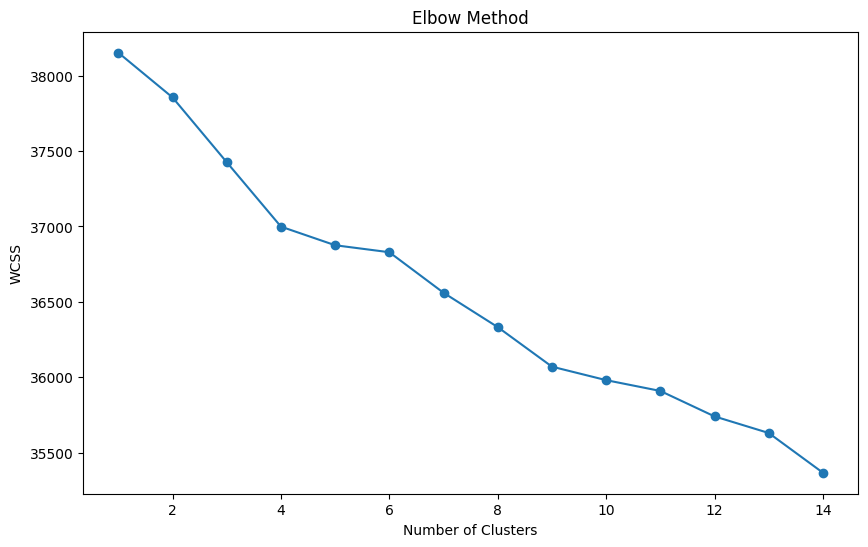

In [ ]:
fig, ax = plt.subplots(figsize=(10, 6))
plt.plot(range(1, 15), wcss, marker='o')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.title('Elbow Method')
plt.show()

**Choosing total number of clusters k=9, threshold with clear Elbow curve.**

In [ ]:
k=9
knnModel = KMeans (n_clusters=k, init= "k-means++", max_iter=100, n_init=1)
knnModel.fit(featuresData)
#Create K-means clustering model for 9 clusters.

KMeans(max_iter=100, n_clusters=9, n_init=1)

In [ ]:
description["cluster"] = knnModel.labels_
#Assign the cluster labels generated by the K-means model to Description subset. 

<ipython-input-47-d6a397c4e65c>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  description["cluster"] = knnModel.labels_


In [ ]:
description.head()

,id,name,cluster
0,2595,skylit midtown castl,6
1,5121,blissartsspace!,6
2,5203,cozi clean guest room - famili apt,3
3,5178,larg furnish room near b'way,3
4,5136,"larg sunni brooklyn duplex, patio + garden",6


In [ ]:
print("Cluster Centroids:\n")
order_centroids = knnModel.cluster_centers_.argsort()[:, ::-1]
#Sort in descending order of feature importance for each cluster.
terms = vectorizer.get_feature_names_out()

for i in range(k):
    print(f"Cluster {i+1}:")
    top_features = [terms[j] for j in order_centroids[i, :10]]
    #Print top 10 importance feature name.
    print(top_features)

Cluster Centroids:

Cluster 1:
['5ba', 'loc', 'extraordinari', 'nofe', 'homestead', '243', 'dahiari', 'petit', '757', 'jfk7']
Cluster 2:
['238', 'nite', 'destin', 'loc', 'kipsbay', 'complete', '2021', 'jfk7', 'mezzanin', '157']
Cluster 3:
['nicest', '757', 'areas', '141', 'extraordinari', 'chuckjohnson', 'jfk7', 'fly', 'homestead', 'montalcino']
Cluster 4:
['loc', 'jfk7', '757', '336', 'extraordinari', 'montalcino', '204', 'restaurant', 'doubles', 'nurtur']
Cluster 5:
['141', '243', '757', '336', 'montalcino', '233', 'esteem', 'fruta', 'areas', 'restaurant']
Cluster 6:
['entire', '243', '141', '336', 'presideti', 'leisur', 'loc', 'jfk7', 'nicest', '157']
Cluster 7:
['243', '157', '336', 'collegiate', 'homestead', 'jfk7', '757', 'radiant', 'montalcino', 'extraordinari']
Cluster 8:
['construction', 'loc', '243', 'jfk7', 'enclav', '141', 'radiant', 'nurtur', 'restaurant', '336']
Cluster 9:
['rem', 'priv', 'quartz', '243', 'nicest', '141', 'fly', '157', 'chuckjohnson', '490']


In [ ]:
uniqueClusters = description["cluster"].unique()

for clusterLabel in uniqueClusters:
    print(f"Cluster {clusterLabel + 1}:")

    #Get data points (feature names) belonging to each cluster.
    clusterSamples = description[description["cluster"] == clusterLabel]

    print(f"Number of samples: {len(clusterSamples)}")
    print("Sample names:")
    print(clusterSamples["name"].values[:10])
    #Print the first 10 sample names.
    print("\n")

Cluster 7:
Number of samples: 23194
Sample names:
['skylit midtown castl' 'blissartsspace!'
 'larg sunni brooklyn duplex, patio + garden'
 'rooftop deck/citi views. great apt'
 'lovely, cozy, room 1, best area; legal rental' 'most central location!'
 'uptown sanctuari w/ privat bath (month to month)'
 'central park 1br sunni condo' 'sanctuari in east flatbush'
 'amaz location! wburg. large, bright & tranquil']


Cluster 4:
Number of samples: 6101
Sample names:
['cozi clean guest room - famili apt' "larg furnish room near b'way"
 'comfortable, sunni room' 'room in the heart of astoria'
 'ue beauti blue room' 'room with en suit bathroom & deck'
 'larg b&b style room' 'new york room with a view'
 'larg room - deck access in clinton hill best area'
 'cozi room in east villag with ac']


Cluster 3:
Number of samples: 3337
Sample names:
['onli 2 stop to manhattan studio' 'alcov studio w/ outdoor patio deck'
 'one bedroom mini studio - free wifi'
 'studio 3 block from empir state build'
 'bri

In [ ]:
description["cluster"].unique()

array([6, 3, 2, 8, 4, 7, 1, 5, 0], dtype=int32)

In [ ]:
uniqueClusters = description["cluster"].unique()

for clusterLabel in uniqueClusters:
  print(f"Cluster {clusterLabel}:")
    
  #Get subset belonging to each cluster.
  clusterSamples = description[description["cluster"] == clusterLabel]
  #Create new dataframe for each subset. 
  clusterFeatures = featuresData.reindex(clusterSamples.index)
  #Calculate the term frequencies within each cluster.
  termFrequencies = np.sum(clusterFeatures.values, axis=0)
    
  #Get the feature names
  featureNames = vectorizer.get_feature_names_out()
  #Create a dictionary of word frequencies.
  wordFrequencies = dict(zip(featureNames, termFrequencies))
  #Sort the words by frequency in descending order.
  sortedWords = sorted(wordFrequencies.items(), key=lambda x: x[1], reverse=True)
    
  numWords = 10  
    
  for word, frequency in sortedWords[:numWords]:
    print(f"Word: {word}, Frequency: {frequency:.3f}")
    #Print top 10 words of each cluster and their frequency.

Cluster 6:
Word: 243, Frequency: 1326.953
Word: 157, Frequency: 762.398
Word: 336, Frequency: 627.817
Word: collegiate, Frequency: 543.521
Word: homestead, Frequency: 502.234
Word: jfk7, Frequency: 496.776
Word: 757, Frequency: 496.321
Word: radiant, Frequency: 471.565
Word: montalcino, Frequency: 448.028
Word: extraordinari, Frequency: 405.414
Cluster 3:
Word: loc, Frequency: 1528.352
Word: jfk7, Frequency: 829.091
Word: 757, Frequency: 350.778
Word: 336, Frequency: 201.742
Word: extraordinari, Frequency: 194.697
Word: montalcino, Frequency: 180.151
Word: 204, Frequency: 177.151
Word: restaurant, Frequency: 151.716
Word: doubles, Frequency: 147.902
Word: nurtur, Frequency: 135.980
Cluster 2:
Word: nicest, Frequency: 1023.083
Word: 757, Frequency: 135.548
Word: areas, Frequency: 119.289
Word: 141, Frequency: 111.948
Word: extraordinari, Frequency: 93.648
Word: chuckjohnson, Frequency: 88.475
Word: jfk7, Frequency: 82.713
Word: fly, Frequency: 75.944
Word: homestead, Frequency: 75.179
W

**Now, we got 9 clusters from Listings 'name'. 
Merge clustered Listings 'name', and nearest subway location/names calculated at the beginning.**

## **Merge data: Listings, Subway and cluster Description.**

In [ ]:
subway.head()

,OBJECTID,NAME,Subway_longitude,Subway_latitude
0,1,Astor Pl,-73.99107,40.73005
1,2,Canal St,-74.00019,40.71880
2,3,50th St,-73.98385,40.76173
3,4,Bergen St,-73.97500,40.68086
4,5,Pennsylvania Ave,-73.89489,40.66471


In [ ]:
subway[subway["Subway_longitude"]==-73.98459]
#Doouble check.

,OBJECTID,NAME,Subway_longitude,Subway_latitude
59,60,42nd St - Bryant Pk,-73.98459,40.75418


In [ ]:
mergedData = pd.merge(listings, subway[['Subway_longitude', 'Subway_latitude', 'NAME']], 
                     left_on=['NearestStationLongitude', 'NearestStationLatitude'], 
                     right_on=['Subway_longitude', 'Subway_latitude'], how='left')

In [ ]:
mergedData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,NearestStationLatitude,NearestStationLongitude,Distance,Subway_longitude,Subway_latitude,NAME
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,...,3,314,1,NaN,40.75418,-73.98459,0.067703,-73.98459,40.75418,42nd St - Bryant Pk
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,...,2,365,0,NaN,40.68138,-73.95685,0.288617,-73.95685,40.68138,Franklin Ave
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,...,1,0,0,NaN,40.80397,-73.96685,0.036540,-73.96685,40.80397,Cathedral Pkwy (110th St)
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,...,1,106,52,NaN,40.76457,-73.98073,0.128014,-73.98073,40.76457,57th St
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,...,1,181,1,NaN,40.66541,-73.99287,0.209688,-73.99287,40.66541,Prospect Ave


In [ ]:
description = description[["id", "cluster"]]

In [ ]:
mergedData2 = pd.merge(mergedData, description[['id', 'cluster']], on='id', how='left')

In [ ]:
mergedData2.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,...,availability_365,number_of_reviews_ltm,license,NearestStationLatitude,NearestStationLongitude,Distance,Subway_longitude,Subway_latitude,NAME,cluster
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,...,314,1,NaN,40.75418,-73.98459,0.067703,-73.98459,40.75418,42nd St - Bryant Pk,6
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,...,365,0,NaN,40.68138,-73.95685,0.288617,-73.95685,40.68138,Franklin Ave,6
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,...,0,0,NaN,40.80397,-73.96685,0.036540,-73.96685,40.80397,Cathedral Pkwy (110th St),3
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,...,106,52,NaN,40.76457,-73.98073,0.128014,-73.98073,40.76457,57th St,3
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,...,181,1,NaN,40.66541,-73.99287,0.209688,-73.99287,40.66541,Prospect Ave,6


## **Write to csv file.**

In [ ]:
description.to_csv('listingsCluster.csv', index=False)

## **Merge Reviews Scores.**

In [ ]:
pd.set_option('display.max_colwidth', None)
# Read the dataframe from the file
reviewsScore = pd.read_csv("reviewsScore.xls")
reviewsScore

,id_value,polarity_score
0,2595,"{'roberta_neg': 0.13033417, 'roberta_neu': 0.8080124, 'roberta_pos': 0.061653525}"
1,2595,"{'roberta_neg': 0.0071270172, 'roberta_neu': 0.04637799, 'roberta_pos': 0.946495}"
2,2595,"{'roberta_neg': 0.0017230441, 'roberta_neu': 0.0058131837, 'roberta_pos': 0.992464}"
3,2595,"{'roberta_neg': 0.0014082947, 'roberta_neu': 0.015730685, 'roberta_pos': 0.98286104}"
4,2595,"{'roberta_neg': 0.0012992539, 'roberta_neu': 0.0065642414, 'roberta_pos': 0.9921366}"
...,...,...
1106416,832045240627733621,"{'roberta_neg': 0.0014001984, 'roberta_neu': 0.0070719724, 'roberta_pos': 0.99152786}"
1106417,832045240627733621,"{'roberta_neg': 0.002515694, 'roberta_neu': 0.017003987, 'roberta_pos': 0.9804804}"
1106418,835703681287484641,"{'roberta_neg': 0.001204781, 'roberta_neu': 0.020150654, 'roberta_pos': 0.97864443}"
1106419,832049090494847039,"{'roberta_neg': 0.001910388, 'roberta_neu': 0.02622865, 'roberta_pos': 0.971861}"


In [ ]:
reviewsScore.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1106421 entries, 0 to 1106420
Data columns (total 2 columns):
 #   Column          Non-Null Count    Dtype 
---  ------          --------------    ----- 
 0   id_value        1106421 non-null  int64 
 1   polarity_score  1106421 non-null  object
dtypes: int64(1), object(1)
memory usage: 16.9+ MB


In [ ]:
uniqueCount = reviewsScore["id_value"].nunique()
print(uniqueCount)

32607


In [ ]:
import ast
reviewsScore["polarity_score"] = reviewsScore["polarity_score"].apply(ast.literal_eval)
reviewsScore["neg"] = reviewsScore["polarity_score"].apply(lambda x: x["roberta_neg"])
reviewsScore["neu"] = reviewsScore["polarity_score"].apply(lambda x: x["roberta_neu"])
reviewsScore["pos"] = reviewsScore["polarity_score"].apply(lambda x: x["roberta_pos"])
#Separate original polarity_score into three scores. 

In [ ]:
reviewsScore = reviewsScore.drop("polarity_score", axis=1)
reviewsScore.rename(columns={'id_value': 'id'}, inplace=True)
reviewsScore['id'] = reviewsScore['id'].astype(int)
reviewsScore.head()

,id,neg,neu,pos
0,2595,0.130334,0.808012,0.061654
1,2595,0.007127,0.046378,0.946495
2,2595,0.001723,0.005813,0.992464
3,2595,0.001408,0.015731,0.982861
4,2595,0.001299,0.006564,0.992137


In [ ]:
listings["id"].nunique()

42931

In [ ]:
reviewsScore["id"].nunique()

32607

In [ ]:
groupedIDs = reviewsScore.groupby('id').mean().reset_index()
#Group reviews scores with same ID using mean value. 

In [ ]:
groupedIDs = pd.DataFrame(groupedIDs)

In [ ]:
groupedIDs.columns

Index(['id', 'neg', 'neu', 'pos'], dtype='object')

In [ ]:
mergedData3 = listings.merge(groupedIDs, on="id", how="inner")

In [ ]:
mergedData3.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,NearestStationLatitude,NearestStationLongitude,Distance,neg,neu,pos
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN,40.75418,-73.98459,0.067703,0.032255,0.107489,0.860256
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN,40.68138,-73.95685,0.288617,0.017825,0.042350,0.939825
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN,40.80397,-73.96685,0.036540,0.008947,0.014396,0.976657
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN,40.76457,-73.98073,0.128014,0.064989,0.195013,0.739998
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN,40.66541,-73.99287,0.209688,0.001492,0.008472,0.990037


In [ ]:
mergedData3.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32607 entries, 0 to 32606
Data columns (total 24 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              32607 non-null  int64  
 1   name                            32602 non-null  object 
 2   host_id                         32607 non-null  int64  
 3   host_name                       32604 non-null  object 
 4   neighbourhood_group             32607 non-null  object 
 5   neighbourhood                   32607 non-null  object 
 6   latitude                        32607 non-null  float64
 7   longitude                       32607 non-null  float64
 8   room_type                       32607 non-null  object 
 9   price                           32607 non-null  int64  
 10  minimum_nights                  32607 non-null  int64  
 11  number_of_reviews               32607 non-null  int64  
 12  last_review                     

## **Compile Final Dataset.**

In [ ]:
mergedData2.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license',
       'NearestStationLatitude', 'NearestStationLongitude', 'Distance',
       'Subway_longitude', 'Subway_latitude', 'NAME', 'cluster'],
      dtype='object')

In [ ]:
mergedData3.columns

Index(['id', 'name', 'host_id', 'host_name', 'neighbourhood_group',
       'neighbourhood', 'latitude', 'longitude', 'room_type', 'price',
       'minimum_nights', 'number_of_reviews', 'last_review',
       'reviews_per_month', 'calculated_host_listings_count',
       'availability_365', 'number_of_reviews_ltm', 'license',
       'NearestStationLatitude', 'NearestStationLongitude', 'Distance', 'neg',
       'neu', 'pos'],
      dtype='object')

In [ ]:
finalData = pd.merge(mergedData3, mergedData2[['id', 'NearestStationLatitude', 'NearestStationLongitude', 'Distance', 'Subway_longitude', 'Subway_latitude', 'NAME', 'cluster']], on='id', how='left')

In [ ]:
finalData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,NearestStationLatitude_x,NearestStationLongitude_x,Distance_x,neg,neu,pos,NearestStationLatitude_y,NearestStationLongitude_y,Distance_y,Subway_longitude,Subway_latitude,NAME,cluster
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN,40.75418,-73.98459,0.067703,0.032255,0.107489,0.860256,40.75418,-73.98459,0.067703,-73.98459,40.75418,42nd St - Bryant Pk,6
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN,40.68138,-73.95685,0.288617,0.017825,0.042350,0.939825,40.68138,-73.95685,0.288617,-73.95685,40.68138,Franklin Ave,6
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN,40.80397,-73.96685,0.036540,0.008947,0.014396,0.976657,40.80397,-73.96685,0.036540,-73.96685,40.80397,Cathedral Pkwy (110th St),3
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN,40.76457,-73.98073,0.128014,0.064989,0.195013,0.739998,40.76457,-73.98073,0.128014,-73.98073,40.76457,57th St,3
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN,40.66541,-73.99287,0.209688,0.001492,0.008472,0.990037,40.66541,-73.99287,0.209688,-73.99287,40.66541,Prospect Ave,6


In [ ]:
finalData = finalData.drop(['NearestStationLatitude_x', 'NearestStationLongitude_x', 'Distance_x'], axis=1)
#Drop redundant columns.
finalData = finalData.rename(columns={'NearestStationLatitude_y': 'NearestStationLatitude', 'NearestStationLongitude_y': 'NearestStationLongitude', 'Distance_y': 'Distance'})
#Rename columns.

In [ ]:
finalData.shape

(32607, 28)

In [ ]:
finalData.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license,neg,neu,pos,NearestStationLatitude,NearestStationLongitude,Distance,Subway_longitude,Subway_latitude,NAME,cluster
0,2595,Skylit Midtown Castle,2845,Jennifer,Manhattan,Midtown,40.75356,-73.98559,Entire home/apt,150,30,49,2022-06-21,0.30,3,314,1,NaN,0.032255,0.107489,0.860256,40.75418,-73.98459,0.067703,-73.98459,40.75418,42nd St - Bryant Pk,6
1,5121,BlissArtsSpace!,7356,Garon,Brooklyn,Bedford-Stuyvesant,40.68535,-73.95512,Private room,60,30,50,2019-12-02,0.30,2,365,0,NaN,0.017825,0.042350,0.939825,40.68138,-73.95685,0.288617,-73.95685,40.68138,Franklin Ave,6
2,5203,Cozy Clean Guest Room - Family Apt,7490,MaryEllen,Manhattan,Upper West Side,40.80380,-73.96751,Private room,75,2,118,2017-07-21,0.72,1,0,0,NaN,0.008947,0.014396,0.976657,40.80397,-73.96685,0.036540,-73.96685,40.80397,Cathedral Pkwy (110th St),3
3,5178,Large Furnished Room Near B'way,8967,Shunichi,Manhattan,Midtown,40.76457,-73.98317,Private room,68,2,575,2023-02-19,3.41,1,106,52,NaN,0.064989,0.195013,0.739998,40.76457,-73.98073,0.128014,-73.98073,40.76457,57th St,3
4,5136,"Large Sunny Brooklyn Duplex, Patio + Garden",7378,Rebecca,Brooklyn,Sunset Park,40.66265,-73.99454,Entire home/apt,275,60,3,2022-08-10,0.03,1,181,1,NaN,0.001492,0.008472,0.990037,40.66541,-73.99287,0.209688,-73.99287,40.66541,Prospect Ave,6


In [ ]:
finalData.to_csv('finalDataset.csv', index=False)